In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
import xgboost as xgb
import plotly.express as px
import numpy as np
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 df=pd.read_csv("/content/drive/MyDrive/pros/breast-cancer.csv")
df.columns

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/pros/breast-cancer.csv'

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print('Empty data:')
df.isnull().sum()

Empty data:


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
categories = df['diagnosis'].nunique()
print("Number of catogories:", categories)

Number of catogories: 2


In [ ]:
category_counts = df['diagnosis'].value_counts()
print("Number of samples in each category :", category_counts)

Number of samples in each category : B    357
M    212
Name: diagnosis, dtype: int64


<Axes: xlabel='diagnosis', ylabel='count'>

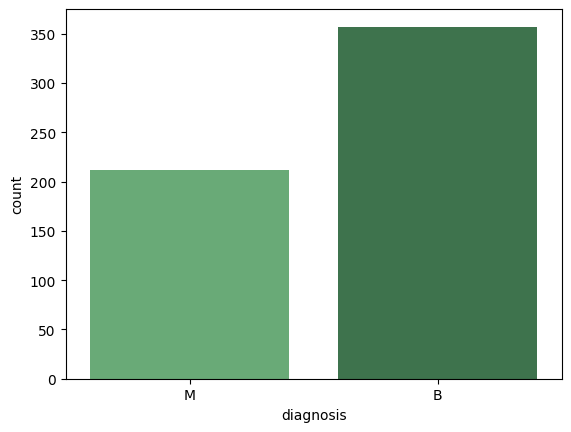

In [ ]:
sns.countplot(x='diagnosis',data=df,palette='Greens_d')

## M for Malignant
## B for Benign

έχουμε άνισα κατανεμημένα δεδομένα => έτσι θα χρησιμοποιήσουμε : oversample the minority class (malignant) to achieve a more balanced dataset.

In [ ]:
pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: xlabel='radius_worst', ylabel='radius_mean'>

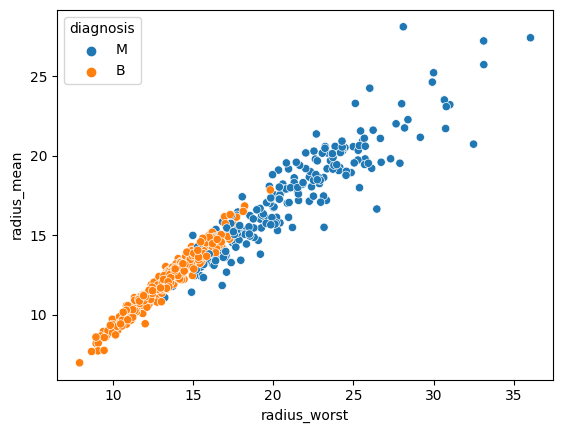

In [ ]:
sns.scatterplot(x='radius_worst',y='radius_mean',data=df,hue='diagnosis')

<Axes: xlabel='id', ylabel='radius_se'>

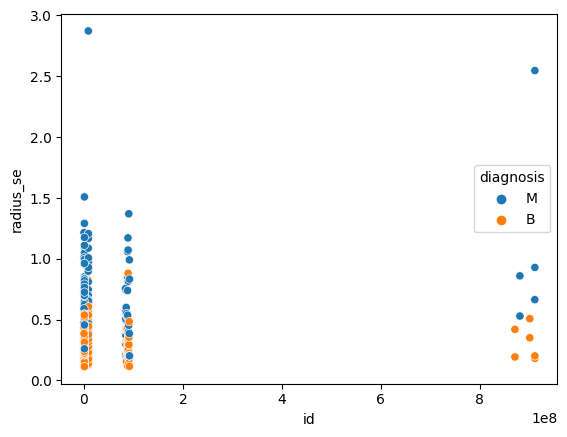

In [ ]:
sns.scatterplot(x='id',y='radius_se',data=df,hue='diagnosis')

Δεν αποτελεί κριτήριο για την ταξινόμηση στις δύο κλάσεις(drop). Αποτελεί λάθος κατά την πειραματική μέτρηση

<Axes: xlabel='texture_worst', ylabel='texture_mean'>

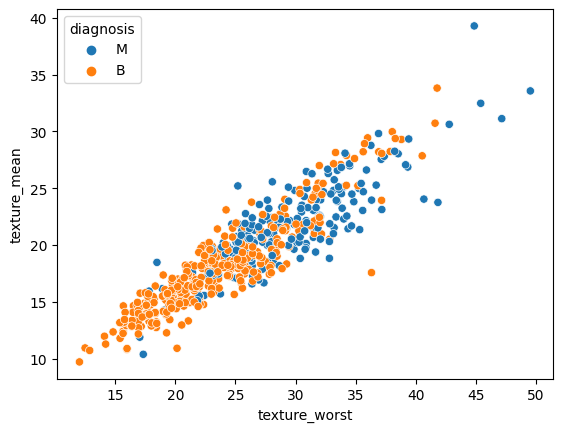

In [ ]:
sns.scatterplot(x='texture_worst',y='texture_mean',data=df,hue='diagnosis')

Δεν αποτελεί κριτήριο για την ταξινόμηση στις δύο κλάσεις (drop)

<Axes: xlabel='perimeter_worst', ylabel='perimeter_mean'>

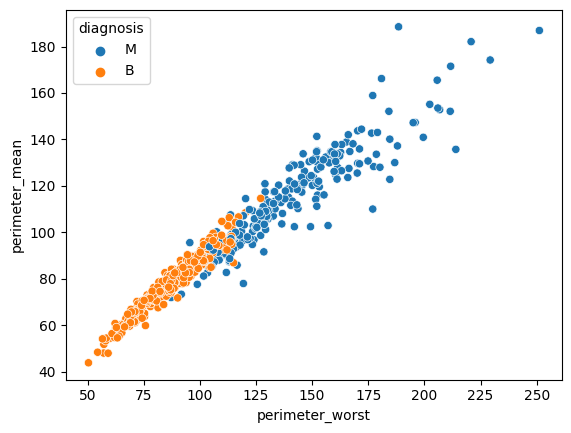

In [ ]:
sns.scatterplot(x='perimeter_worst',y='perimeter_mean',data=df,hue='diagnosis')

<Axes: xlabel='area_worst', ylabel='area_mean'>

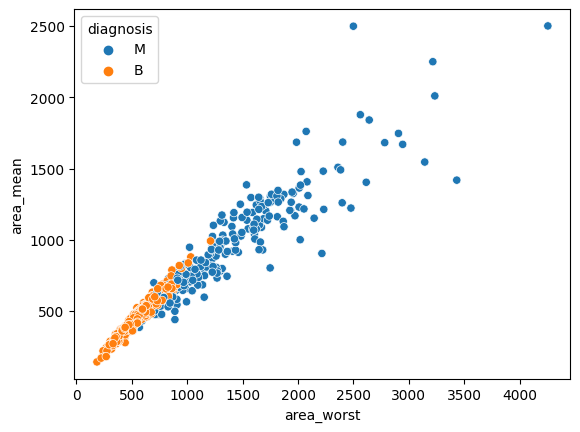

In [ ]:
sns.scatterplot(x='area_worst',y='area_mean',data=df,hue='diagnosis')

<Axes: xlabel='smoothness_worst', ylabel='smoothness_mean'>

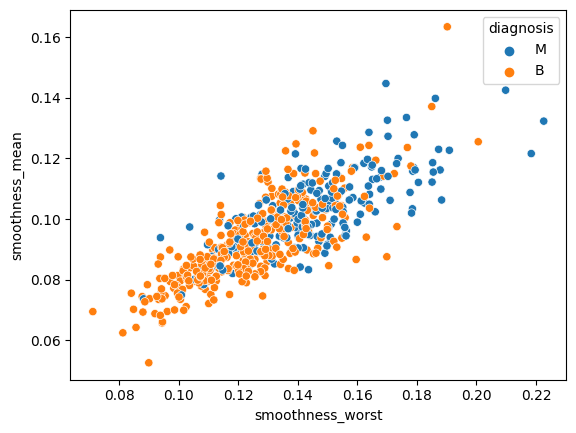

In [ ]:
sns.scatterplot(x='smoothness_worst',y='smoothness_mean',data=df,hue='diagnosis')

<Axes: xlabel='concavity_worst', ylabel='concavity_mean'>

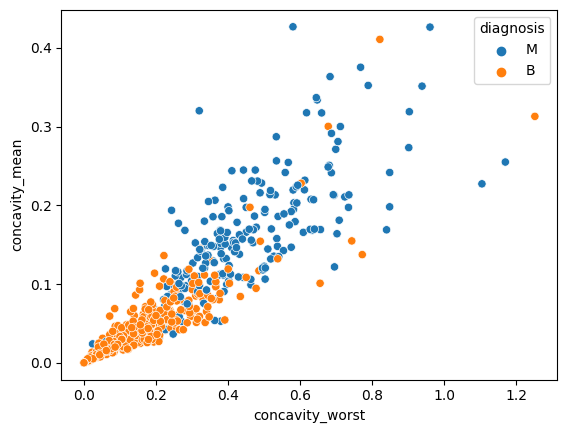

In [ ]:
sns.scatterplot(x='concavity_worst',y='concavity_mean',data=df,hue='diagnosis')

Δεν αποτελεί κριτήριο για την ταξινόμηση στις δύο κλάσεις (drop)

<Axes: xlabel='compactness_worst', ylabel='compactness_mean'>

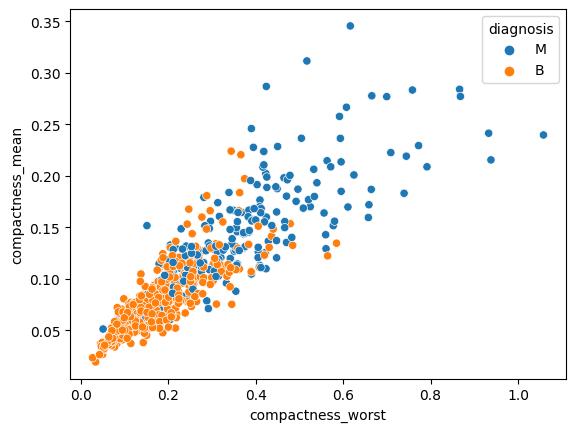

In [ ]:
sns.scatterplot(x='compactness_worst',y='compactness_mean',data=df,hue='diagnosis')

<Axes: xlabel='concave points_worst', ylabel='concave points_mean'>

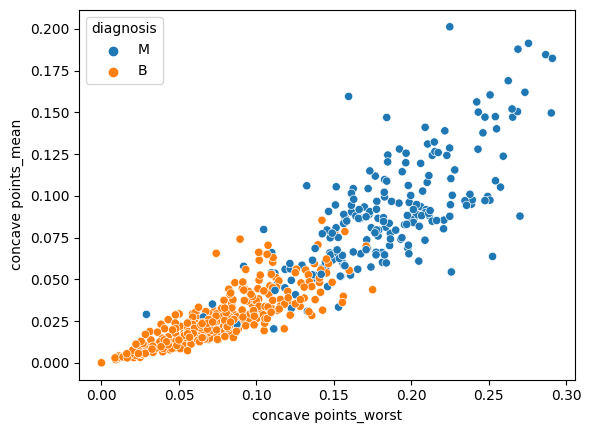

In [ ]:
sns.scatterplot(x='concave points_worst',y='concave points_mean',data=df,hue='diagnosis')

<Axes: xlabel='symmetry_worst', ylabel='symmetry_mean'>

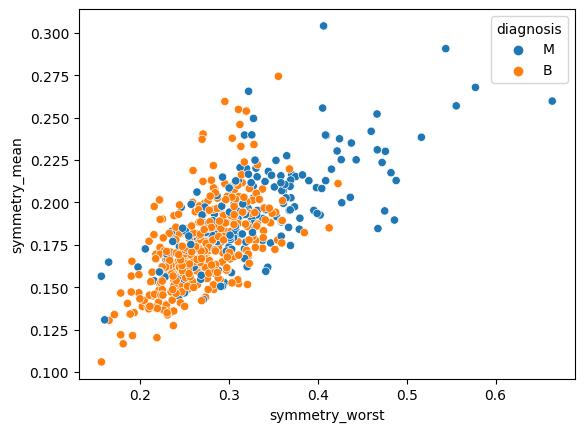

In [ ]:
sns.scatterplot(x='symmetry_worst',y='symmetry_mean',data=df,hue='diagnosis')

Δεν αποτελεί κριτήριο για την ταξινόμηση στις δύο κλάσεις (drop)

<Axes: xlabel='fractal_dimension_worst', ylabel='fractal_dimension_mean'>

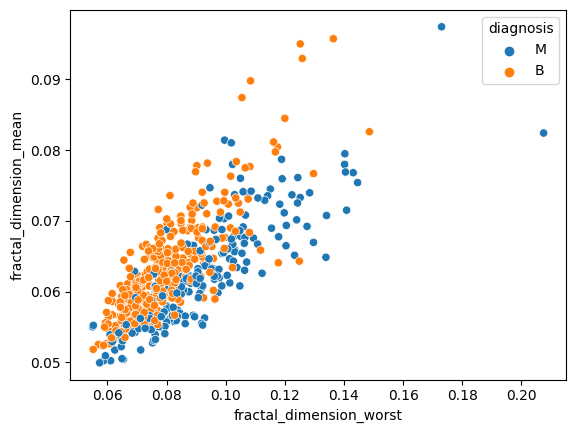

In [ ]:
sns.scatterplot(x='fractal_dimension_worst',y='fractal_dimension_mean',data=df,hue='diagnosis')

Δεν αποτελεί κριτήριο για την ταξινόμηση στις δύο κλάσεις (drop)

Θα χρησιμοποιήσουμε Mann-Whitney U (μη παραμετρικό test) για να δούμε αν υπάρχουν στατιστικά σημαντικά διαφορές ανάμεσα στα διάφορα χαρακτηριστικά των όγκων, ώστε να μπορούμε να συμπεράνουμε αν αποτελεί το κάθε χαρακτηριστικό σημαντικό κρητήριο για τον διαχωρισμό σε καλοήθη και κακοήθη.
Θα συγκρίνουμε τις κατανομές δύο ανεξάρτητων δειγμάτων στις δύο μη ισορροπημένες κλάσεις μας.


In [ ]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [ ]:
all_ps=[]
all_features=[]

In [ ]:
#perimeter_mean
from scipy.stats import mannwhitneyu


malignant_data_mean = df[df['diagnosis'] == 'M']['perimeter_mean']


benign_data_mean = df[df['diagnosis'] == 'B']['perimeter_mean']


t_stat, p_value = mannwhitneyu(malignant_data_mean, benign_data_mean)

all_ps.append(p_value)
all_features.append('perimeter_mean')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 71665.0
P-value: 3.553870225963875e-71


=> αυτό το αποτέλεσμα (p<0.05)
υποδηλώνει ότι υπάρχει σημαντική διαφορά στον τρόπο με τον οποίο διαφέρει το  «περιμετρικό μέσο» μεταξύ κακοήθων και καλοήθων περιπτώσεων.

In [ ]:
#perimeter_worst

from scipy.stats import mannwhitneyu


malignant_data_worst = df[df['diagnosis'] == 'M']['perimeter_worst']

benign_data_worst = df[df['diagnosis'] == 'B']['perimeter_worst']

t_stat, p_value = mannwhitneyu(malignant_data_worst, benign_data_worst)

all_ps.append(p_value)
all_features.append('perimeter_worst')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 73826.0
P-value: 2.5830037182989858e-80


In [ ]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [ ]:
#radius_mean

from scipy.stats import mannwhitneyu


malignant_data_mean = df[df['diagnosis'] == 'M']['radius_mean']


benign_data_mean = df[df['diagnosis'] == 'B']['radius_mean']



# Perform paired t-test
t_stat, p_value = mannwhitneyu(malignant_data_mean, benign_data_mean)

all_ps.append(p_value)
all_features.append('radius_mean')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 70955.0
P-value: 2.6929427727965647e-68


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:
#radius_worst

from scipy.stats import mannwhitneyu


malignant_data_worst = df[df['diagnosis'] == 'M']['radius_worst']

benign_data_worst = df[df['diagnosis'] == 'B']['radius_worst']

# Calculate the differences
diff_malignant = malignant_data_worst - malignant_data_mean
diff_benign = benign_data_worst - benign_data_mean



# Perform paired t-test
t_stat, p_value = mannwhitneyu(malignant_data_worst, benign_data_worst)

all_ps.append(p_value)
all_features.append('radius_worst')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 73447.0
P-value: 1.1356300904893913e-78


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [ ]:
#texture_mean

from scipy.stats import mannwhitneyu


malignant_data_mean = df[df['diagnosis'] == 'M']['texture_mean']

benign_data_mean = df[df['diagnosis'] == 'B']['texture_mean']



# Perform paired t-test
t_stat, p_value = mannwhitneyu(malignant_data_mean, benign_data_mean)

all_ps.append(p_value)
all_features.append('texture_mean')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 58717.5
P-value: 3.428626504744227e-28


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:
#texture_worst
from scipy.stats import mannwhitneyu


malignant_data_worst = df[df['diagnosis'] == 'M']['texture_worst']


benign_data_worst = df[df['diagnosis'] == 'B']['texture_worst']



# Perform paired t-test
t_stat, p_value = mannwhitneyu(malignant_data_worst, benign_data_worst)

all_ps.append(p_value)
all_features.append('texture_worst')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 59384.0
P-value: 6.517717977951487e-30


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [ ]:

#smoothness_mean

from scipy.stats import mannwhitneyu


malignant_data_mean = df[df['diagnosis'] == 'M']['smoothness_mean']

benign_data_mean = df[df['diagnosis'] == 'B']['smoothness_mean']



# Perform paired t-test
t_stat, p_value = mannwhitneyu(malignant_data_mean, benign_data_mean)

all_ps.append(p_value)
all_features.append('smoothness_mean')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 54647.0
P-value: 7.793006595586556e-19


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:
#smoothness_worst

from scipy.stats import mannwhitneyu


malignant_data_worst = df[df['diagnosis'] == 'M']['smoothness_worst']

benign_data_worst = df[df['diagnosis'] == 'B']['smoothness_worst']


t_stat, p_value = mannwhitneyu(malignant_data_worst, benign_data_worst)


all_ps.append(p_value)
all_features.append('smoothness_worst')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 57070.0
P-value: 3.637942156482749e-24


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:

#fractal_dimension_mean

from scipy.stats import mannwhitneyu


malignant_data_mean = df[df['diagnosis'] == 'M']['fractal_dimension_mean']


benign_data_mean = df[df['diagnosis'] == 'B']['fractal_dimension_mean']


t_stat, p_value = mannwhitneyu(malignant_data_mean, benign_data_mean)

all_ps.append(p_value)
all_features.append('fractal_dimension_mean')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 36671.5
P-value: 0.537185602135624


=> Δεν υπάρχει σημαντικά στατιστική διαφορά. άρα δεν θα το χρησιμοποιήσουμε (drop)

In [ ]:
#fractal_dimension_worst

from scipy.stats import mannwhitneyu



malignant_data_worst = df[df['diagnosis'] == 'M']['fractal_dimension_worst']

benign_data_worst = df[df['diagnosis'] == 'B']['fractal_dimension_worst']


t_stat, p_value = mannwhitneyu(malignant_data_worst, benign_data_worst)

all_ps.append(p_value)
all_features.append('fractal_dimension_worst')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 51917.0
P-value: 1.1442398346150665e-13


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:

#symmetry_mean
from scipy.stats import mannwhitneyu


malignant_data_mean = df[df['diagnosis'] == 'M']['symmetry_mean']


benign_data_mean = df[df['diagnosis'] == 'B']['symmetry_mean']

t_stat, p_value = mannwhitneyu(malignant_data_mean, benign_data_mean)

all_ps.append(p_value)
all_features.append('symmetry_mean')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 52870.0
P-value: 2.2680501067477204e-15


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:
#symmetry_worst

from scipy.stats import mannwhitneyu



malignant_data_worst = df[df['diagnosis'] == 'M']['symmetry_worst']

benign_data_worst = df[df['diagnosis'] == 'B']['symmetry_worst']


t_stat, p_value = mannwhitneyu(malignant_data_worst, benign_data_worst)

all_ps.append(p_value)
all_features.append('symmetry_worst')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 55774.5
P-value: 3.1512369934706657e-21


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:

#concave points_mean
from scipy.stats import mannwhitneyu


malignant_data_mean = df[df['diagnosis'] == 'M']['concave points_mean']


benign_data_mean = df[df['diagnosis'] == 'B']['concave points_mean']


t_stat, p_value = mannwhitneyu(malignant_data_mean, benign_data_mean)

all_ps.append(p_value)
all_features.append('concave points_mean')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 72992.5
P-value: 1.0063237037340002e-76


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:
#concave points_worst
from scipy.stats import mannwhitneyu



malignant_data_worst = df[df['diagnosis'] == 'M']['concave points_worst']

benign_data_worst = df[df['diagnosis'] == 'B']['concave points_worst']


t_stat, p_value = mannwhitneyu(malignant_data_worst, benign_data_worst)

all_ps.append(p_value)
all_features.append('concave points_worst')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 73164.0
P-value: 1.8639972354360316e-77


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:
#compactness_mean
from scipy.stats import mannwhitneyu


malignant_data_mean = df[df['diagnosis'] == 'M']['compactness_mean']


benign_data_mean = df[df['diagnosis'] == 'B']['compactness_mean']


t_stat, p_value = mannwhitneyu(malignant_data_mean, benign_data_mean)

all_ps.append(p_value)
all_features.append('compactness_mean')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 65374.5
P-value: 8.951992005223344e-48


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:
#compactness_worst
from scipy.stats import mannwhitneyu



malignant_data_worst = df[df['diagnosis'] == 'M']['compactness_worst']

benign_data_worst = df[df['diagnosis'] == 'B']['compactness_worst']


t_stat, p_value = mannwhitneyu(malignant_data_worst, benign_data_worst)

all_ps.append(p_value)
all_features.append('compactness_worst')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 65262.5
P-value: 2.1155252552555298e-47


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:
#concavity_mean
from scipy.stats import mannwhitneyu


malignant_data_mean = df[df['diagnosis'] == 'M']['concavity_mean']


benign_data_mean = df[df['diagnosis'] == 'B']['concavity_mean']


t_stat, p_value = mannwhitneyu(malignant_data_mean, benign_data_mean)

all_ps.append(p_value)
all_features.append('concavity_mean')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 70978.5
P-value: 2.164548790621846e-68


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:
#concavity_worst
from scipy.stats import mannwhitneyu



malignant_data_worst = df[df['diagnosis'] == 'M']['concavity_worst']

benign_data_worst = df[df['diagnosis'] == 'B']['concavity_worst']

t_stat, p_value = mannwhitneyu(malignant_data_worst, benign_data_worst)

all_ps.append(p_value)
all_features.append('concavity_worst')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 69732.5
P-value: 1.7617231681140704e-63


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:
px.histogram(data_frame=df,x=df.area_mean,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [ ]:
#area_mean
from scipy.stats import mannwhitneyu


malignant_data_mean = df[df['diagnosis'] == 'M']['area_mean']


benign_data_mean = df[df['diagnosis'] == 'B']['area_mean']


t_stat, p_value = mannwhitneyu(malignant_data_mean, benign_data_mean)


all_ps.append(p_value)
all_features.append('area_mean')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 71015.5
P-value: 1.539780362858885e-68


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:
#area_worst
from scipy.stats import mannwhitneyu



malignant_data_worst = df[df['diagnosis'] == 'M']['area_worst']

benign_data_worst = df[df['diagnosis'] == 'B']['area_worst']


# Perform paired t-test
t_stat, p_value = mannwhitneyu(malignant_data_worst, benign_data_worst)

all_ps.append(p_value)
all_features.append('area_worst')
print(f"Mann-Whitney U-statistic: {t_stat}")
print(f"P-value: {p_value}")

Mann-Whitney U-statistic: 73400.5
P-value: 1.8033090105551777e-78


=> Στατιστική σημαντική διαφορά άρα αποτελούν κριτήριο διαχωρισμού σε Καλοήθη και Κακοήθη όγκο.


In [ ]:
combined_array = np.column_stack((all_features, all_ps))

print(f"The result of the Mann-Whitney U-statistic :")
print(combined_array)
print(".............................................")

unrelevant_features_stat_test = combined_array[combined_array[:, 1].astype(float) > 0.05]

print(f"Τhese features have p-value>0.05=> are unrelevant for our purpose:")
print(unrelevant_features_stat_test)

The result of the Mann-Whitney U-statistic :
[['perimeter_mean' '3.553870225963875e-71']
 ['perimeter_worst' '2.5830037182989858e-80']
 ['radius_mean' '2.6929427727965647e-68']
 ['radius_worst' '1.1356300904893913e-78']
 ['texture_mean' '3.428626504744227e-28']
 ['texture_worst' '6.517717977951487e-30']
 ['smoothness_mean' '7.793006595586556e-19']
 ['smoothness_worst' '3.637942156482749e-24']
 ['fractal_dimension_worst' '1.1442398346150665e-13']
 ['symmetry_mean' '2.2680501067477204e-15']
 ['symmetry_worst' '3.1512369934706657e-21']
 ['concave points_mean' '1.0063237037340002e-76']
 ['concave points_worst' '1.8639972354360316e-77']
 ['compactness_mean' '8.951992005223344e-48']
 ['compactness_worst' '2.1155252552555298e-47']
 ['concavity_mean' '2.164548790621846e-68']
 ['concavity_worst' '1.7617231681140704e-63']
 ['area_mean' '1.539780362858885e-68']
 ['area_worst' '1.8033090105551777e-78']
 ['fractal_dimension_mean' '0.537185602135624']]
.............................................
Τ

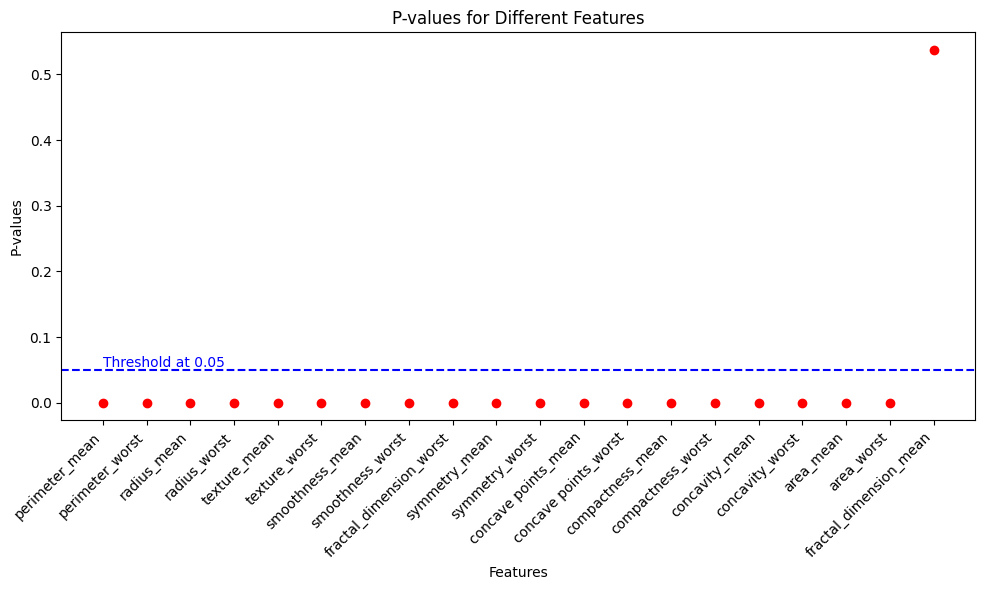

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(all_features, all_ps, color='red', marker='o')

plt.axhline(y=0.05, color='blue', linestyle='--', label='Threshold at 0.05')

plt.text(0, 0.05, 'Threshold at 0.05', color='blue', ha='left', va='bottom')
plt.xlabel('Features')
plt.ylabel('P-values')
plt.title('P-values for Different Features')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()

plt.show()


In [ ]:
df.drop(['id'], axis=1, inplace=True)

In [ ]:
#df.drop(['id','fractal_dimension_worst','fractal_dimension_se','fractal_dimension_mean','symmetry_worst','symmetry_se','symmetry_mean','concavity_worst','concavity_se','concavity_mean','texture_worst','texture_se','texture_mean','perimeter_se','radius_se','area_se','smoothness_se','compactness_se','concave points_se'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['diagnosis']=l.fit_transform(df.diagnosis)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Θα χρησιμοποιήσουμε τα δεδομένα που έχουν μεγάλη συσχέτιση με τη διάγνωση. (>0.2)

In [ ]:
corr = df.corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


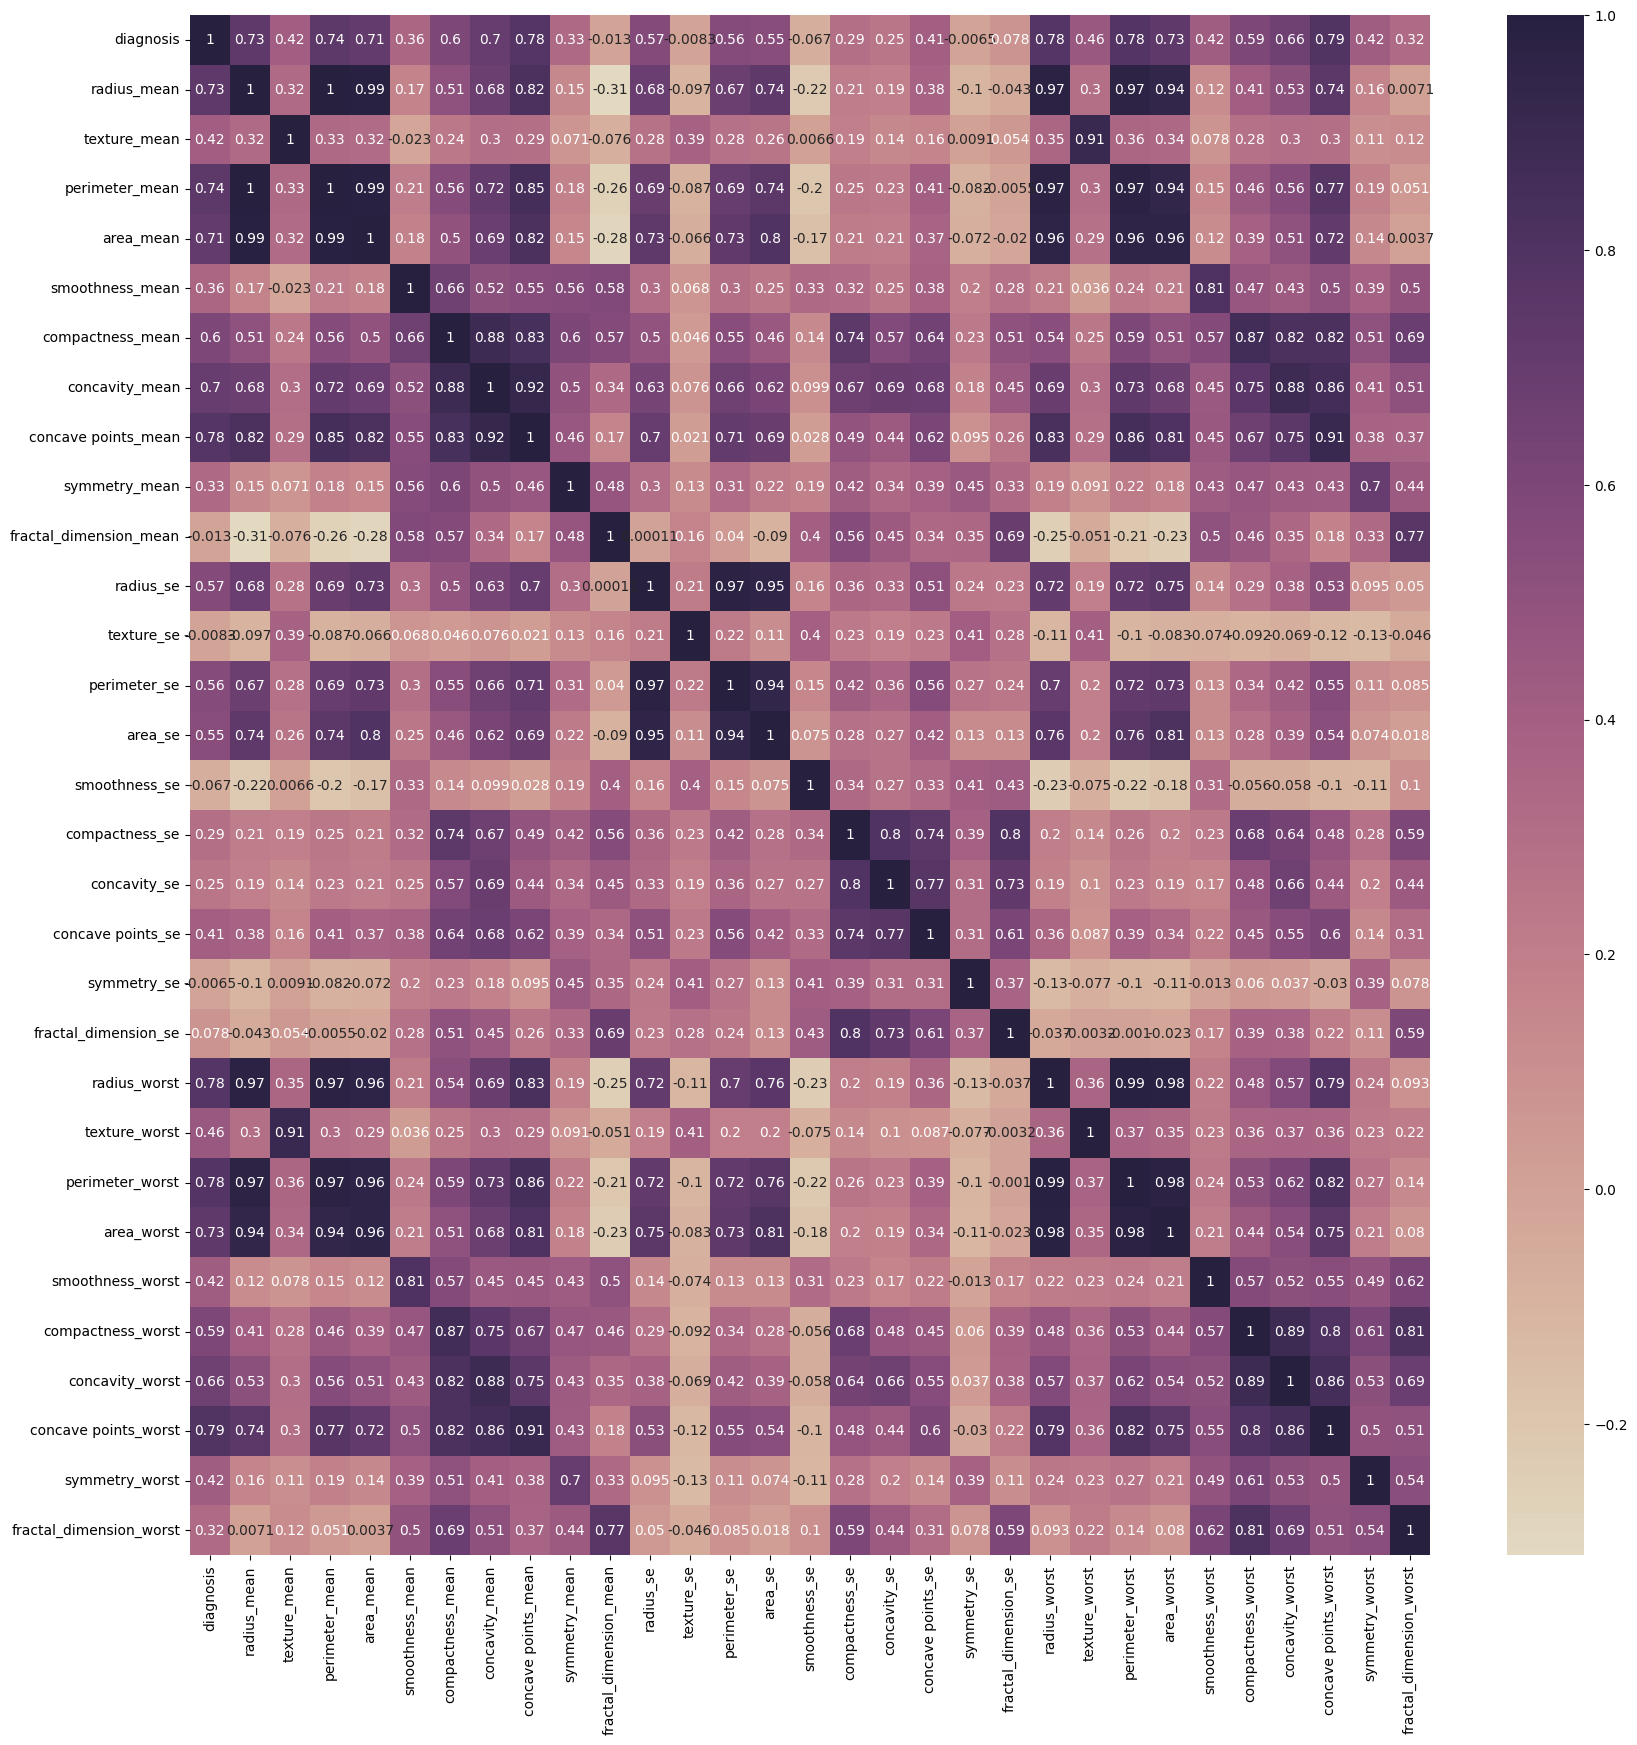


Τhese features have correlation<0.2=> are unrelevant for our purpose:
fractal_dimension_mean    0.012838
texture_se                0.008303
smoothness_se             0.067016
symmetry_se               0.006522
fractal_dimension_se      0.077972
Name: diagnosis, dtype: float64


In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]
unrelevant_features = cor_target[cor_target <= 0.2]
# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('diagnosis')
print()
print(f"Τhese features have correlation<0.2=> are unrelevant for our purpose:")
print(unrelevant_features)

=>Όπως είδαμε και από τις γραφικές παραστάσεις τα πειραματικά λάθη δεν αποτελούν κριτήριο διαχωρισμού στις δύο κλάσεις.
=>Το fractal_dimension_mean, όπως έδειξαν και τα στατιστικά τεστ, δεν αποτελει χαρακτηριστικό διαχωρισμού στις δύο κλάσεις.  

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
import numpy as np

In [ ]:
X = df[names]
y = df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier=LogisticRegression()
# Create space of candidate learning algorithms and their hyperparameters
search_space =[{'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': range(10, 1000, 50),
                 'classifier__max_depth': range(1,10,1),
                },

                {'classifier': [KNeighborsClassifier()],
                 'classifier__n_neighbors': [1, 3, 5],
                 'classifier__metric':['euclidean','manhattan']
                },
               {'classifier': [MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)],
                 'classifier__activation': ['relu', 'tanh', 'logistic'],
                 'classifier__alpha': [0.0001, 0.001, 0.01],
                },
              ]

In [ ]:

# Define the resampling strategy (RandomOverSampler for oversampling the minority class=>This is an oversampling technique that randomly duplicates instances from the minority class to balance the class distribution.)
oversampler = RandomOverSampler(sampling_strategy='minority')

# Create a pipeline that combines oversampling with the classifier
pipeline = Pipeline(steps=[('oversampler', oversampler), ('classifier', classifier)])
#Το over sampling γίνεται στο train set, το test set παραμένει αναλλίωτο για να μπορεί να αξιολογηθεί το μοντέλο μας στη συνέχεια.
grid = GridSearchCV(pipeline, search_space, cv=5, n_jobs=-1, verbose=0)

import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning

In [ ]:
# Fit grid search
best_model = grid.fit(X_train, y_train)

In [ ]:
results = pd.DataFrame(grid.cv_results_)

# Access the best set of parameters
best_params = grid.best_params_
print(best_params)

# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier': RandomForestClassifier(max_depth=7, n_estimators=610), 'classifier__max_depth': 7, 'classifier__n_estimators': 610}
Pipeline(steps=[('oversampler',
                 RandomOverSampler(sampling_strategy='minority')),
                ('classifier',
                 RandomForestClassifier(max_depth=7, n_estimators=610))])


Από το grid search with cross-validation επιλέγουμε ως ιδανικό ταξινομητή τον Random Forest με υπερπαραμέτρους max_depth=7, n_estimators=610.

In [ ]:
preds = best_model.predict(X_test)

f1 = f1_score(y_test, preds)

print(f"F1 Score: {f1}")

F1 Score: 0.9534883720930233


Εκπαίδευση του μοντέλου σε μη ισορροπημένα Δεδομένα

In [ ]:
imbalance_model = RandomForestClassifier(max_depth=7, n_estimators=610).fit(X_train, y_train)

In [ ]:
preds = imbalance_model.predict(X_test)

f1 = f1_score(y_test, preds)

print(f"F1 Score with imbalance data: {f1}")

F1 Score with imbalance data: 0.9523809523809524


Εκπαίδευση του μοντέλου σε μη ισορροπημένα δεδομένα και με χρήση ολόκληρου του συνόλου δεδομένων χωρις την απομάκρυνση των μη σημαντικών χαρακτηριστικών.

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
all_features_model = RandomForestClassifier(max_depth=7, n_estimators=610).fit(X_train, y_train)

preds = all_features_model.predict(X_test)

f1 = f1_score(y_test, preds)

print(f"F1 Score with all the features from the dataset: {f1}")

F1 Score with all the features from the dataset: 0.9523809523809524


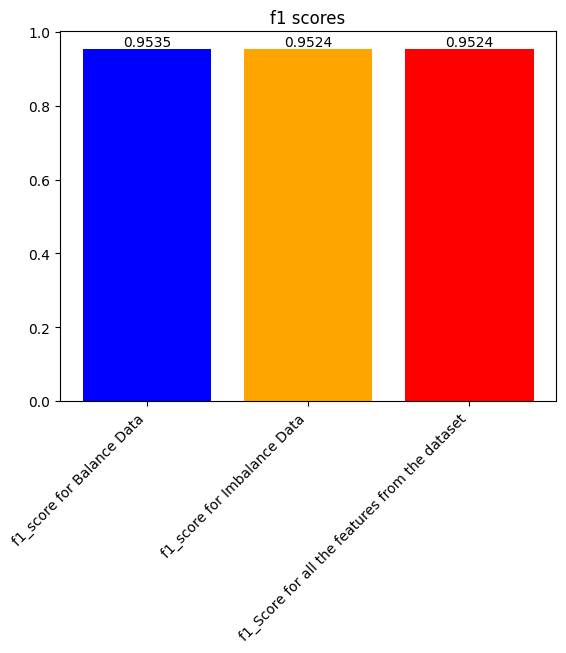

In [ ]:

labels = ['f1_score for Balance Data', 'f1_score for Imbalance Data', 'f1_Score for all the features from the dataset']
values = [0.9534883720930233, 0.9523809523809524, 0.9523809523809524]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'orange', 'red'])

# Προσθήκη τίτλου και ετικέτας άξονα
plt.title('f1 scores')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
# Εμφάνιση γραφήματος
plt.show()